In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os 
from glob import glob
from tqdm import tqdm
from utils import *

data_folder = "/home/cbel/Desktop/zhe/data"

In [2]:
def load_data(imgs_path):
    
    imgs = []
    number = []
    for i in range(len(imgs_path)):
        number.append(imgs_path[i][-8:-4])
        img = np.load(imgs_path[i])
        imgs.append(img)
    imgs = np.array(imgs)
    return imgs, number

In [3]:
def rotate(image, angle, center=None, scale=1.0):
    # 獲得圖像尺寸
    (r, c) = image.shape
     
    # 若未指定旋轉中心，怎以圖像中心為中心
    if center is None:
        center = (r / 2, c / 2)

    # 旋轉
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (r, c))
    
    return rotated

In [4]:
datasets = ["original", "ENT", "HOM", "GLN", "RLN", "RP", "SRE", "COA"]
for dataset in datasets:
    augimgs_folder = data_folder + f"/augment/{dataset}"
    check_folder(augimgs_folder)
    imgs_path = glob(data_folder + f"/multi_view/{dataset}/*.npy")
    imgs_path.sort()
    imgs, number = load_data(imgs_path)

    num = 0
    for i in range(len(imgs)):
        n = 1
        for flip in [0, 1]:
            angels = [0, -45, -90, -135, -180, -225, -270, -315]
            for a in range(len(angels)):
                if dataset == "original":
                    aug_img = np.zeros((3, 1, 32, 32), dtype=np.uint8)
                else:
                    aug_img = np.zeros((3, 2, 32, 32), dtype=np.uint8)
                for j in range(len(imgs[i])):
                    for k in range(len(imgs[i][j])):
                        img = imgs[i][j][k]
                        if flip == 1:
                            img = cv2.flip(img, 1)
                        r_img = rotate(img, angels[a])
                        aug_img[j][k] = r_img
                np.save(augimgs_folder + "/" + number[i] + "_%02d" %(n), aug_img)
                n += 1
                num += 1
    print(f"after data augmentation, the number of {dataset} images is from {len(imgs)} to {num}")

/home/cbel/Desktop/zhe/data/augment/original目錄已存在
after data augmentation, the number of original images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/ENT目錄已存在
after data augmentation, the number of ENT images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/HOM目錄已存在
after data augmentation, the number of HOM images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/GLN目錄已存在
after data augmentation, the number of GLN images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/RLN目錄已存在
after data augmentation, the number of RLN images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/RP目錄已存在
after data augmentation, the number of RP images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/SRE目錄已存在
after data augmentation, the number of SRE images is from 1386 to 22176
/home/cbel/Desktop/zhe/data/augment/COA目錄已存在
after data augmentation, the number of COA images is from 1386 to 22176


22176


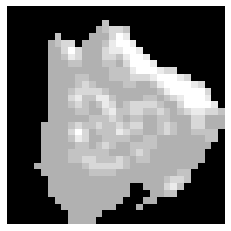

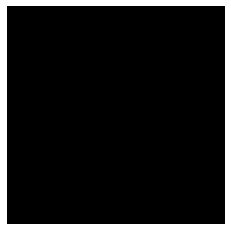

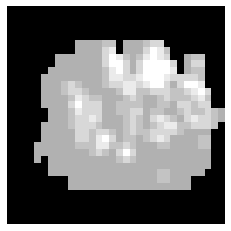

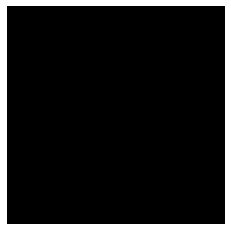

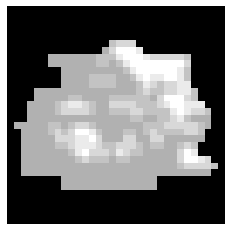

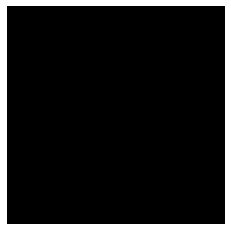

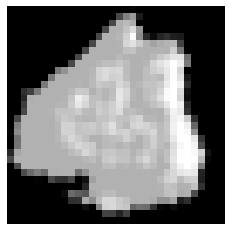

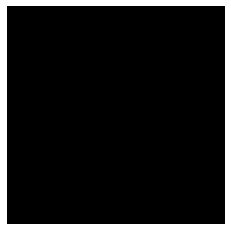

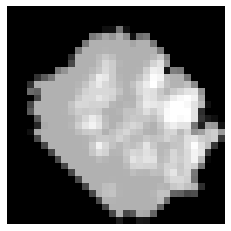

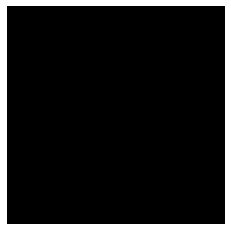

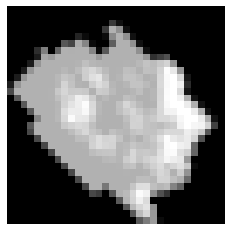

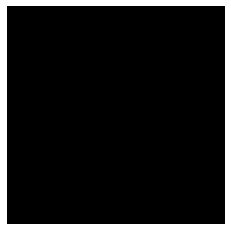

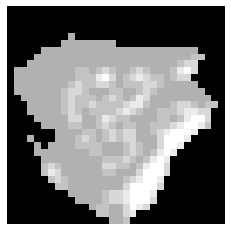

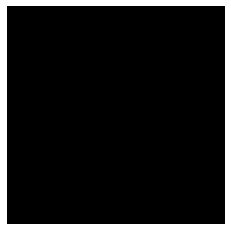

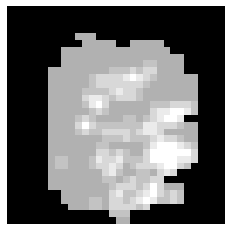

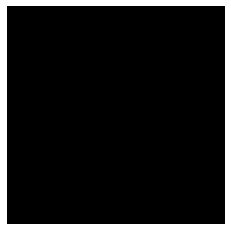

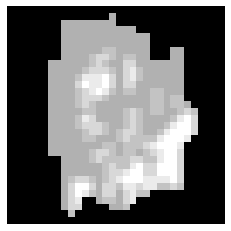

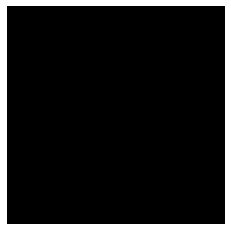

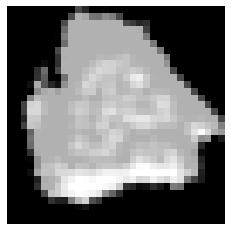

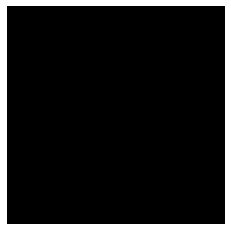

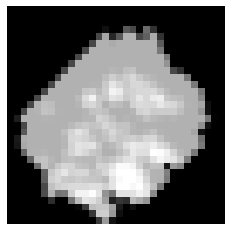

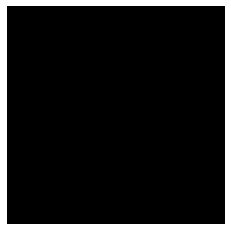

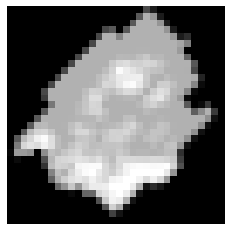

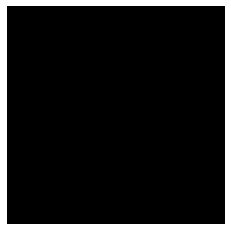

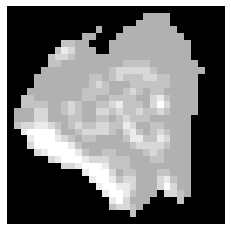

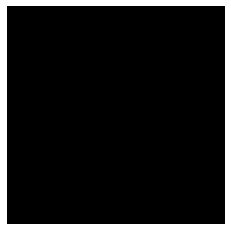

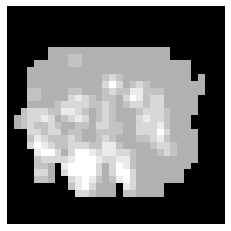

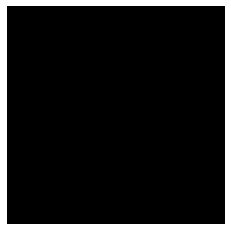

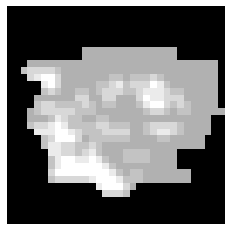

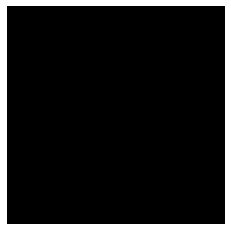

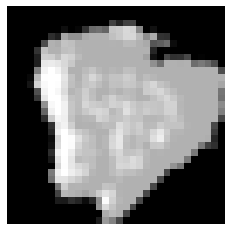

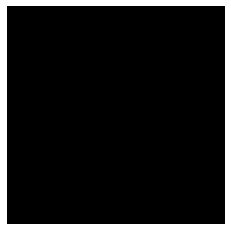

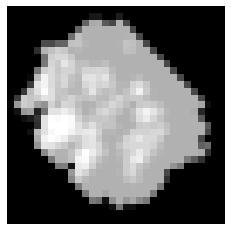

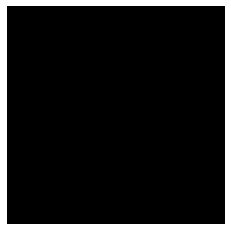

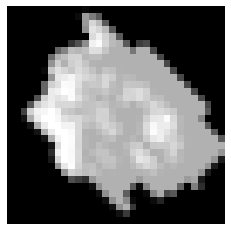

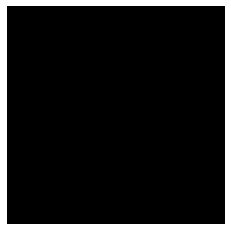

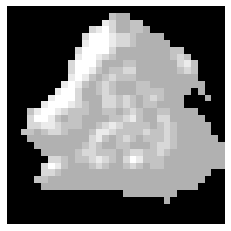

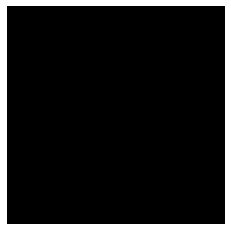

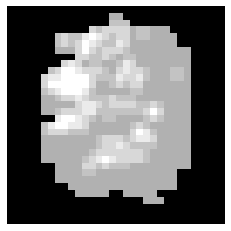

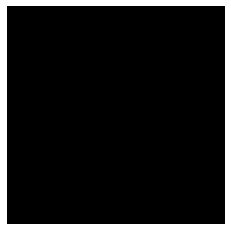

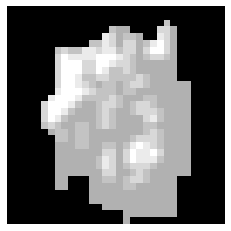

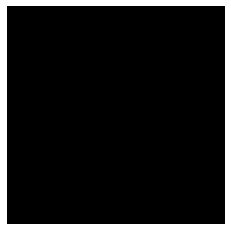

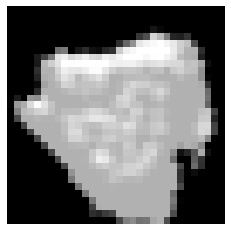

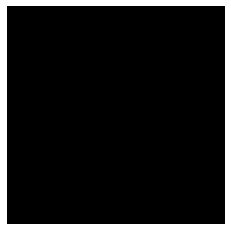

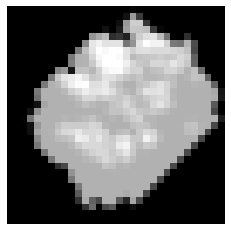

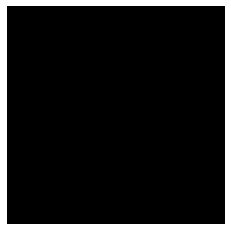

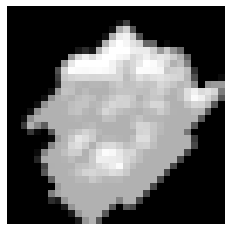

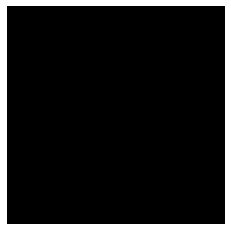

In [5]:
dataset = "COA"
augimgs_path = glob(data_folder + f"/augment/{dataset}" + "/*.npy")
augimgs_path.sort()
print(len(augimgs_path))
for i in range(8):
    imgs = np.load(augimgs_path[i])
    for img in imgs:
        for i in range(len(img)):
            imshow(img[i])